# **Multi-Layer Perceptron**

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. It consist of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron (or processing element) that uses a nonlinear activation function to process the output of the previous layer. MLP utilizes a supervised learning technique called backpropagation for training the network. It is a modification of the standard linear perceptron and can distinguish data that is not linearly separable.


In [18]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns

In [19]:
tips = sns.load_dataset('tips')

In [20]:
tips = pd.get_dummies(tips , drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [21]:
X = tips.drop('tip' , axis = 1)
y = tips['tip']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64 , activation='relu' , input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32 , activation='relu'),
    tf.keras.layers.Dense(1),
])

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['mae'])

model.fit(X_train , y_train , epochs=100 , batch_size=32 , verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 13.0767 - mae: 3.3496
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.1116 - mae: 3.0063  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6890 - mae: 2.4854 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2263 - mae: 2.0891  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4761 - mae: 1.7327  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4716 - mae: 1.4198  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5325 - mae: 1.2005 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8932 - mae: 1.0507  
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7077 - mae: 0.9908  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2878 - mae: 0.8738  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2991 - mae: 0.8803  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2395 - mae: 0.8779  
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
loss = model.evaluate(X_test , y_test , verbose=0)
print('Loss: ' , loss[0])

Loss:  1.193281888961792


----

# **Early Stopping**
Early stopping is a technique used to stop the training process of a machine learning model when the model's performance on the validation set starts to degrade. This is useful for preventing overfitting, as it stops the model from fitting the training data too closely and getting stuck in a local minimum.



In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64 , activation='relu' , input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32 , activation='relu'),
    tf.keras.layers.Dense(1),
])

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam' , loss='mean_squared_error')

early_stopping = EarlyStopping(patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 12.0716 - val_loss: 6.6147
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.2065 - val_loss: 5.0286
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.9500 - val_loss: 3.6660
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.4832 - val_loss: 2.5625
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0948 - val_loss: 1.7663
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.0480 - val_loss: 1.3067
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.9476 - val_loss: 1.2236
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4651 - val_loss: 1.3297
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.6961 - val_loss: 1.4694
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.5486 - val_loss: 1.4899
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.4043 - val_loss: 1.3355
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3094 - val_l

In [30]:
loss = model.evaluate(X_test , y_test , verbose=0)
loss

1.090076208114624

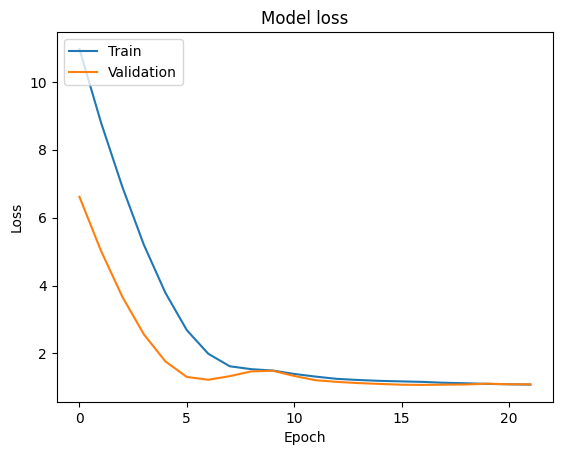

In [31]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()